<a href="https://colab.research.google.com/github/willydata/Time-Series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Time Series Project

##Analizando el precio de cierre y el volumen de transacciones

Iniciamos importando las librerias que vamos a utilizar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Podemos agregar varios archivos de datos en un solo DataFrame:


*   Creamos una lista con los nombres de los archivos que vana formar parte de nuestro Dataframe
*   Instanciamos nuestro método que nos genera el DataFrame
*   Creamos un for loop que busque en nuestro path los archivos que concuerden con la lista que generamos
*   Con el for loop hacemos que la informacion de cada archivo se concatene en un solo DataFrame



In [2]:
path = '/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr'
company_list = ['AAPL_data.csv','GOOG_data.csv','MSFT_data.csv','AMZN_data.csv']
all_data = pd.DataFrame()
for file in company_list:
  current_df = pd.read_csv(path+'/'+file)
  all_data = pd.concat([all_data,current_df])
all_data.shape

(4752, 7)

In [3]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


Convertimos la columba de fecha al formato adecuado para mejorar la visualizacion

In [4]:
all_data['date'] = pd.to_datetime(all_data['date'])

Extraemos los nombres de cada una de las empresas que añadimos a nuestro Dataframe para proceder con la visualizacion

In [5]:
tech_list = all_data['Name'].unique()

Graficamos las cuatro empresas elegidas al mismo tiempo con plt.subplot y regulamos el tamaño con plt.figure

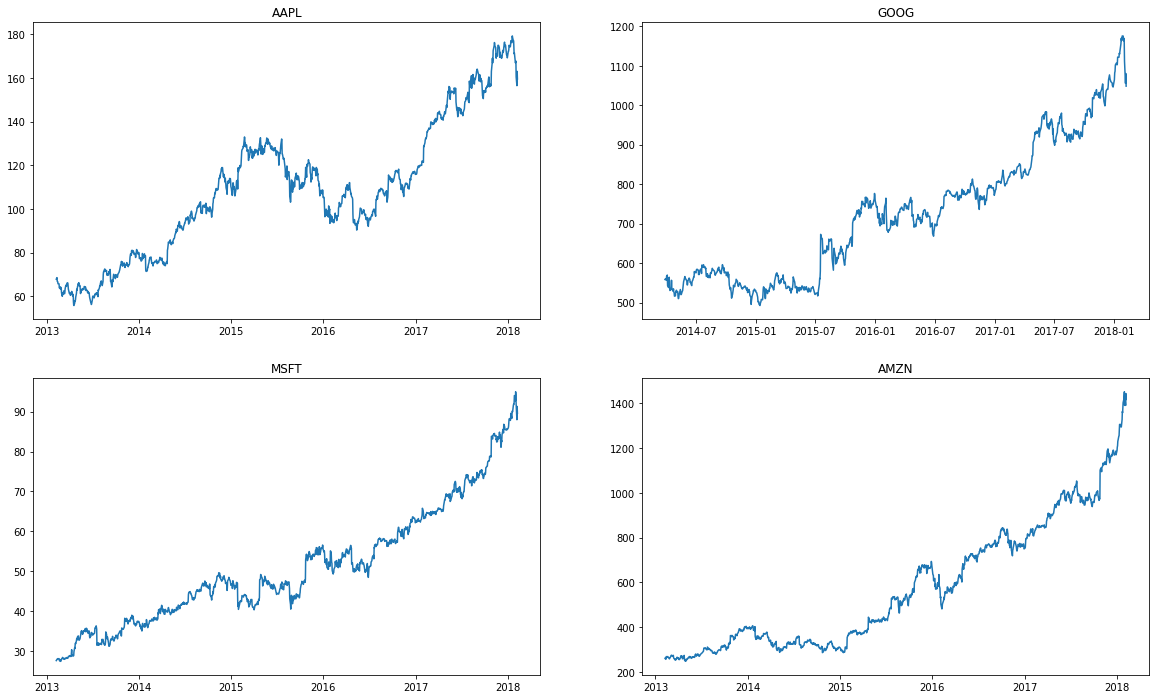

In [6]:
plt.figure(figsize=(20,12))
for i,company in enumerate(tech_list,1):
  plt.subplot(2,2,i)
  df = all_data[all_data['Name']==company]
  plt.plot(df['date'],df['close'])
  plt.title(company)

Una libreria que nos puede dar graficos interactivos similares a iplot es ploty.express por lo que la importamos

In [7]:
import plotly.express as px

Generamos nuestro gráfico interactivo con la ayuda de express

In [8]:
for company in tech_list:
  df = all_data[all_data['Name']==company]
  fig=px.line(df,x='date',y='volume',title=company)
  fig.show()

##Analizando las variaciones de precios

Para esta parte del proyecto vamos a usar el dataset de los valores de las acciones de Apple

In [9]:
apple = pd.read_csv('/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr/AAPL_data.csv')

In [10]:
apple['Daily_price_change'] = apple['close'] - apple['open']
apple.head() 

,date,open,high,low,close,volume,Name,Daily_price_change
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957


In [11]:
apple['1day_%_return'] = ((apple['close']-apple['open'])/apple['close'])*100
apple.head()

,date,open,high,low,close,volume,Name,Daily_price_change,1day_%_return
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,0.1400,0.206325
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,0.4900,0.714688
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-1.6586,-2.481344
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.0286,-0.042869
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,0.2957,0.443624


In [12]:
a_fig = px.line(apple,x='date',y='Daily_price_change')
a_fig.show()

In [13]:
a_fig = px.line(apple,x='date',y='1day_%_return')
a_fig.show()

In [14]:
apple2 = apple.copy()

In [15]:
apple2['date'] = pd.to_datetime(apple2['date'])

In [16]:
apple2.dtypes

date                  datetime64[ns]
open                         float64
high                         float64
low                          float64
close                        float64
volume                         int64
Name                          object
Daily_price_change           float64
1day_%_return                float64
dtype: object

In [17]:
apple2.set_index('date',inplace=True)

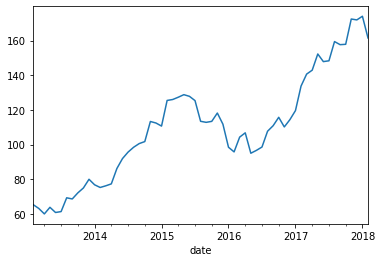

In [18]:
apple2['close'].resample('M').mean().plot(kind='line')

##Analisis Multivariable

In [19]:
appl = pd.read_csv('/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr/AAPL_data.csv')
googl = pd.read_csv('/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr/GOOGL_data.csv')
amzn = pd.read_csv('/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr/AMZN_data.csv')
msft = pd.read_csv('/content/drive/My Drive/Datasets/Time Series Analisis/individual_stocks_5yr/MSFT_data.csv')

In [20]:
close = pd.DataFrame()

In [21]:
close['appl'] = appl['close']
close['googl'] = googl['close']
close['amzn'] = amzn['close']
close['msft'] = msft['close']

In [22]:
close.head()

,appl,googl,amzn,msft
0,67.8542,393.0777,261.95,27.55
1,68.5614,391.6012,257.21,27.86
2,66.8428,390.7403,258.70,27.88
3,66.7156,391.8214,269.47,28.03
4,66.6556,394.3039,269.24,28.04


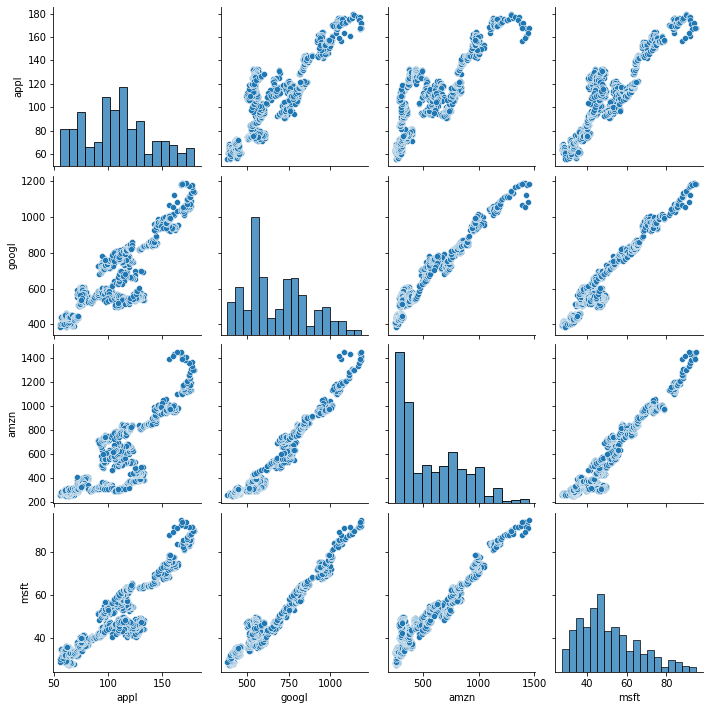

In [23]:
sns.pairplot(close)

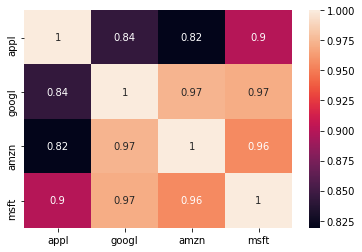

In [24]:
sns.heatmap(close.corr(),annot=True)

##Analisis de Riesgo

In [25]:
data = pd.DataFrame()

In [26]:
data['apple_change'] = ((appl['close'] - appl['open'])/appl['close'])*100
data['googl_change'] = ((googl['close'] - googl['open'])/googl['close'])*100
data['amzn_change'] = ((amzn['close'] - amzn['open'])/amzn['close'])*100
data['msft_change'] = ((msft['close'] - msft['open'])/msft['close'])*100

In [27]:
data.head()

,apple_change,googl_change,amzn_change,msft_change
0,0.206325,0.667196,0.209964,0.725953
1,0.714688,0.513788,-2.328836,0.753769
2,-2.481344,-0.134514,-0.189409,0.000000
3,-0.042869,0.348705,2.946525,0.356761
4,0.443624,1.026873,0.694548,0.427960


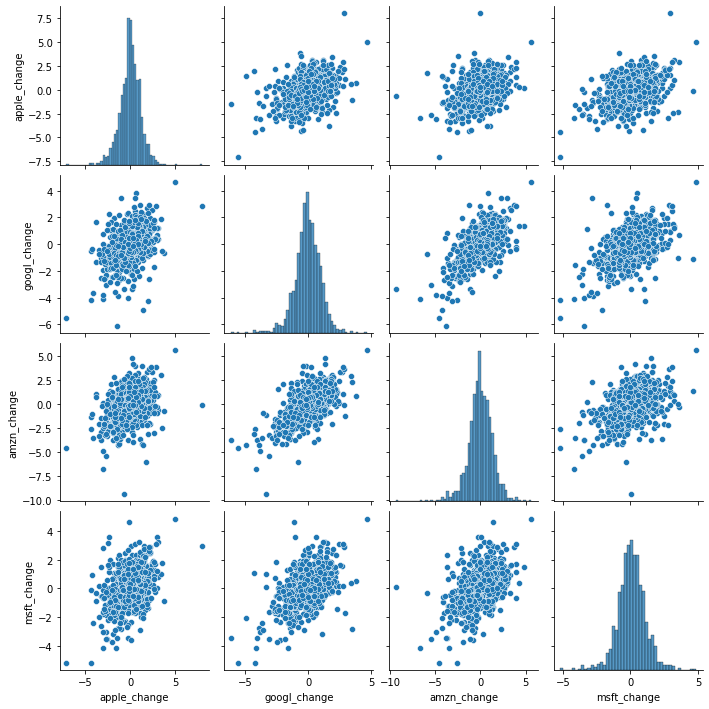

In [28]:
sns.pairplot(data)

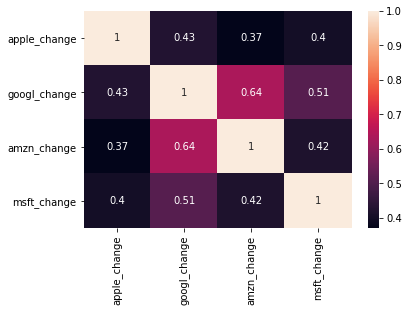

In [29]:
sns.heatmap(data.corr(),annot=True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



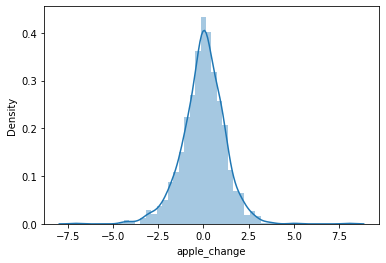

In [30]:
sns.distplot(data['apple_change'])

In [31]:
data['apple_change'].std()

1.1871377131421237

In [32]:
data['apple_change'].std()*2

2.3742754262842474

In [33]:
data['apple_change'].std()*3

3.561413139426371

In [34]:
data['apple_change'].quantile(0.1)

-1.4246644227944307

In [35]:
data.describe()

,apple_change,googl_change,amzn_change,msft_change
count,1259.000000,1259.000000,1259.000000,1259.000000
mean,-0.000215,-0.028349,-0.000398,0.076404
std,1.187138,1.052191,1.358679,1.059260
min,-7.104299,-6.107290,-9.363077,-5.177618
25%,-0.658021,-0.575799,-0.738341,-0.509241
50%,0.042230,-0.004508,-0.002623,0.061069
75%,0.715427,0.624730,0.852568,0.703264
max,8.000388,4.652214,5.640265,4.861491
